# 01 - Exploration des Données (EDA)

**Objectif**: Comprendre la distribution et les caractéristiques du dataset de prédiction de victoire Pokémon Let's Go.

**Dataset**: `matchups.parquet` généré par `build_battle_winner_dataset.py`

**Date**: 2026-01-21

---

## Table des Matières

1. [Chargement des Données](#1-chargement-des-données)
2. [Aperçu du Dataset](#2-aperçu-du-dataset)
3. [Analyse de la Variable Cible](#3-analyse-de-la-variable-cible)
4. [Distribution des Stats Pokémon](#4-distribution-des-stats-pokémon)
5. [Analyse des Types](#5-analyse-des-types)
6. [Analyse des Moves](#6-analyse-des-moves)
7. [Corrélations](#7-corrélations)
8. [Analyse des Features Dérivées](#8-analyse-des-features-dérivées)
9. [Conclusions](#9-conclusions)

## 1. Chargement des Données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Chemins
BASE_DIR = Path('../data/ml/battle_winner')
RAW_DIR = BASE_DIR / 'raw'
PROCESSED_DIR = BASE_DIR / 'processed'

print("📦 Bibliothèques chargées")

📦 Bibliothèques chargées


In [2]:
# Chargement des datasets
df_raw = pd.read_parquet(RAW_DIR / 'matchups.parquet')
df_train = pd.read_parquet(PROCESSED_DIR / 'train.parquet')
df_test = pd.read_parquet(PROCESSED_DIR / 'test.parquet')

print(f"✅ Dataset brut chargé: {df_raw.shape}")
print(f"✅ Train set chargé: {df_train.shape}")
print(f"✅ Test set chargé: {df_test.shape}")

✅ Dataset brut chargé: (34040, 38)
✅ Train set chargé: (27232, 38)
✅ Test set chargé: (6808, 38)


## 2. Aperçu du Dataset

In [3]:
# Informations générales
print("=" * 80)
print("📊 INFORMATIONS GÉNÉRALES")
print("=" * 80)
df_raw.info()

📊 INFORMATIONS GÉNÉRALES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34040 entries, 0 to 34039
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pokemon_a_id      34040 non-null  int64  
 1   pokemon_b_id      34040 non-null  int64  
 2   pokemon_a_name    34040 non-null  object 
 3   pokemon_b_name    34040 non-null  object 
 4   a_hp              34040 non-null  int64  
 5   a_attack          34040 non-null  int64  
 6   a_defense         34040 non-null  int64  
 7   a_sp_attack       34040 non-null  int64  
 8   a_sp_defense      34040 non-null  int64  
 9   a_speed           34040 non-null  int64  
 10  a_type_1          34040 non-null  object 
 11  a_type_2          34040 non-null  object 
 12  b_hp              34040 non-null  int64  
 13  b_attack          34040 non-null  int64  
 14  b_defense         34040 non-null  int64  
 15  b_sp_attack       34040 non-null  int64  
 16  b_sp_defense   

In [4]:
# Premières lignes
print("\n" + "=" * 80)
print("👀 PREMIÈRES LIGNES")
print("=" * 80)
df_raw.head(10)


👀 PREMIÈRES LIGNES


,pokemon_a_id,pokemon_b_id,pokemon_a_name,pokemon_b_name,a_hp,a_attack,a_defense,a_sp_attack,a_sp_defense,a_speed,a_type_1,a_type_2,b_hp,b_attack,b_defense,b_sp_attack,b_sp_defense,b_speed,b_type_1,b_type_2,a_move_name,a_move_power,a_move_type,a_move_priority,a_move_stab,a_move_type_mult,b_move_name,b_move_power,b_move_type,b_move_priority,b_move_stab,b_move_type_mult,speed_diff,hp_diff,a_total_stats,b_total_stats,a_moves_first,winner
0,1,2,Bulbasaur,Ivysaur,45,49,49,65,65,45,Plante,Poison,60,62,63,80,80,60,Plante,Poison,Bomb-Beurk,90.0,Poison,0,1.5,1.0,Bomb-Beurk,90.0,Poison,0,1.5,1.0,-15,-15,318,405,0,0
1,1,3,Bulbasaur,Venusaur,45,49,49,65,65,45,Plante,Poison,80,82,83,100,100,80,Plante,Poison,Bomb-Beurk,90.0,Poison,0,1.5,1.0,Bomb-Beurk,90.0,Poison,0,1.5,1.0,-35,-35,318,525,0,0
2,1,4,Bulbasaur,Charmander,45,49,49,65,65,45,Plante,Poison,39,52,43,60,50,65,Feu,none,Lance-Soleil,200.0,Plante,0,1.5,0.5,Déflagration,110.0,Feu,0,1.5,2.0,-20,6,318,309,0,0
3,1,5,Bulbasaur,Charmeleon,45,49,49,65,65,45,Plante,Poison,58,64,58,80,65,80,Feu,none,Lance-Soleil,200.0,Plante,0,1.5,0.5,Déflagration,110.0,Feu,0,1.5,2.0,-35,-13,318,405,0,0
4,1,6,Bulbasaur,Charizard,45,49,49,65,65,45,Plante,Poison,78,84,78,109,85,100,Feu,Vol,Bomb-Beurk,90.0,Poison,0,1.5,1.0,Boutefeu,120.0,Feu,0,1.5,2.0,-55,-33,318,534,0,0
5,1,7,Bulbasaur,Squirtle,45,49,49,65,65,45,Plante,Poison,44,48,65,50,64,43,Eau,none,Lance-Soleil,200.0,Plante,0,1.5,2.0,Laser Glace,90.0,Glace,0,1.0,2.0,2,1,318,314,1,1
6,1,8,Bulbasaur,Wartortle,45,49,49,65,65,45,Plante,Poison,59,63,80,65,80,58,Eau,none,Lance-Soleil,200.0,Plante,0,1.5,2.0,Laser Glace,90.0,Glace,0,1.0,2.0,-13,-14,318,405,0,1
7,1,9,Bulbasaur,Blastoise,45,49,49,65,65,45,Plante,Poison,79,83,100,85,105,78,Eau,none,Lance-Soleil,200.0,Plante,0,1.5,2.0,Laser Glace,90.0,Glace,0,1.0,2.0,-33,-34,318,530,0,0
8,1,10,Bulbasaur,Caterpie,45,49,49,65,65,45,Plante,Poison,45,30,35,20,20,45,Insecte,none,Lance-Soleil,200.0,Plante,0,1.5,0.5,Charge,40.0,Normal,0,1.0,1.0,0,0,318,195,1,1
9,1,12,Bulbasaur,Butterfree,45,49,49,65,65,45,Plante,Poison,60,45,50,90,80,70,Insecte,Vol,Bomb-Beurk,90.0,Poison,0,1.5,1.0,Lame d'Air,75.0,Vol,0,1.5,2.0,-25,-15,318,395,0,0


In [5]:
# Statistiques descriptives
print("\n" + "=" * 80)
print("📈 STATISTIQUES DESCRIPTIVES")
print("=" * 80)
df_raw.describe()


📈 STATISTIQUES DESCRIPTIVES


,pokemon_a_id,pokemon_b_id,a_hp,a_attack,a_defense,a_sp_attack,a_sp_defense,a_speed,b_hp,b_attack,b_defense,b_sp_attack,b_sp_defense,b_speed,a_move_power,a_move_priority,a_move_stab,a_move_type_mult,b_move_power,b_move_priority,b_move_stab,b_move_type_mult,speed_diff,hp_diff,a_total_stats,b_total_stats,a_moves_first,winner
count,34040.000000,34040.000000,34040.000000,34040.000000,34040.000000,34040.000000,34040.000000,34040.000000,34040.000000,34040.000000,34040.000000,34040.000000,34040.000000,34040.000000,34040.000000,34040.000000,34040.000000,34040.000000,34040.000000,34040.000000,34040.000000,34040.000000,34040.000000,34040.000000,34040.000000,34040.000000,34040.000000,34040.000000
mean,95.183784,95.183784,65.621622,78.145946,71.718919,70.513514,69.005405,72.578378,65.621622,78.145946,71.718919,70.513514,69.005405,72.578378,117.677291,0.047532,1.227688,1.744382,117.677291,0.047532,1.227688,1.744382,0.000000,0.000000,427.583784,427.583784,0.515482,0.500118
std,53.965834,53.965834,28.120956,29.735397,29.115798,33.739255,24.811107,29.934522,28.120956,29.735397,29.115798,33.739255,24.811107,29.934522,52.527115,0.285632,0.249006,0.843631,52.527115,0.285632,0.249006,0.843631,42.448688,39.876959,111.849294,111.849294,0.499768,0.500007
min,1.000000,1.000000,10.000000,5.000000,5.000000,10.000000,20.000000,15.000000,10.000000,5.000000,5.000000,10.000000,20.000000,15.000000,15.000000,0.000000,1.000000,0.000000,15.000000,0.000000,1.000000,0.000000,-135.000000,-240.000000,195.000000,195.000000,0.000000,0.000000
25%,49.000000,49.000000,45.000000,55.000000,50.000000,45.000000,50.000000,50.000000,45.000000,55.000000,50.000000,45.000000,50.000000,50.000000,90.000000,0.000000,1.000000,1.000000,90.000000,0.000000,1.000000,1.000000,-30.000000,-24.000000,325.000000,325.000000,0.000000,0.000000
50%,95.000000,95.000000,63.000000,75.000000,70.000000,65.000000,70.000000,70.000000,63.000000,75.000000,70.000000,65.000000,70.000000,70.000000,90.000000,0.000000,1.000000,2.000000,90.000000,0.000000,1.000000,2.000000,0.000000,0.000000,435.000000,435.000000,1.000000,1.000000
75%,142.000000,142.000000,80.000000,95.000000,90.000000,90.000000,85.000000,93.000000,80.000000,95.000000,90.000000,90.000000,85.000000,93.000000,120.000000,0.000000,1.500000,2.000000,120.000000,0.000000,1.500000,2.000000,30.000000,24.000000,500.000000,500.000000,1.000000,1.000000
max,188.000000,188.000000,250.000000,190.000000,180.000000,194.000000,130.000000,150.000000,250.000000,190.000000,180.000000,194.000000,130.000000,150.000000,250.000000,2.000000,1.500000,4.000000,250.000000,2.000000,1.500000,4.000000,135.000000,240.000000,780.000000,780.000000,1.000000,1.000000


In [6]:
# Colonnes et types
print("\n" + "=" * 80)
print("🔍 COLONNES ET TYPES")
print("=" * 80)
for col in df_raw.columns:
    print(f"{col:30s} | {str(df_raw[col].dtype):15s} | Null: {df_raw[col].isna().sum():6d}")


🔍 COLONNES ET TYPES
pokemon_a_id                   | int64           | Null:      0
pokemon_b_id                   | int64           | Null:      0
pokemon_a_name                 | object          | Null:      0
pokemon_b_name                 | object          | Null:      0
a_hp                           | int64           | Null:      0
a_attack                       | int64           | Null:      0
a_defense                      | int64           | Null:      0
a_sp_attack                    | int64           | Null:      0
a_sp_defense                   | int64           | Null:      0
a_speed                        | int64           | Null:      0
a_type_1                       | object          | Null:      0
a_type_2                       | object          | Null:      0
b_hp                           | int64           | Null:      0
b_attack                       | int64           | Null:      0
b_defense                      | int64           | Null:      0
b_sp_attack        

## 3. Analyse de la Variable Cible

In [7]:
# Distribution de la cible
print("=" * 80)
print("🎯 DISTRIBUTION DE LA VARIABLE CIBLE: winner")
print("=" * 80)

target_counts = df_raw['winner'].value_counts().sort_index()
target_pct = df_raw['winner'].value_counts(normalize=True).sort_index() * 100

result = pd.DataFrame({
    'Count': target_counts,
    'Percentage': target_pct
})
result.index = ['Pokémon A gagne (0)', 'Pokémon B gagne (1)']
print(result)
print(f"\n✅ Balance des classes: {min(target_pct):.1f}% / {max(target_pct):.1f}%")

🎯 DISTRIBUTION DE LA VARIABLE CIBLE: winner
                     Count  Percentage
Pokémon A gagne (0)  17016   49.988249
Pokémon B gagne (1)  17024   50.011751

✅ Balance des classes: 50.0% / 50.0%


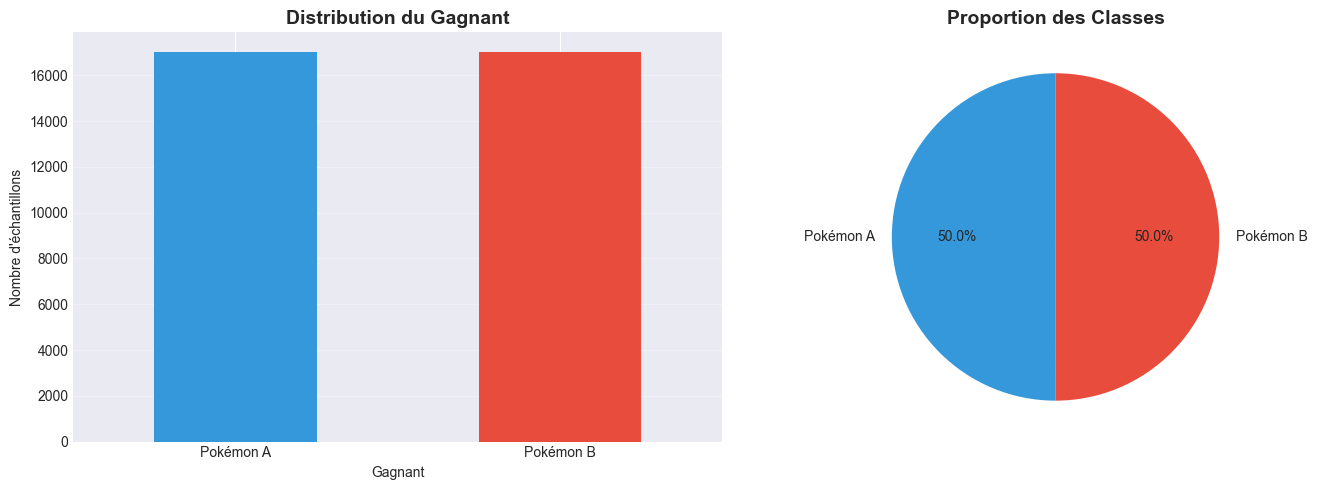

In [8]:
# Visualisation de la cible
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
target_counts.plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'])
axes[0].set_title('Distribution du Gagnant', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Gagnant')
axes[0].set_ylabel("Nombre d'échantillons")
axes[0].set_xticklabels(['Pokémon A', 'Pokémon B'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(target_counts, labels=['Pokémon A', 'Pokémon B'], autopct='%1.1f%%',
            colors=['#3498db', '#e74c3c'], startangle=90)
axes[1].set_title('Proportion des Classes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Distribution des Stats Pokémon

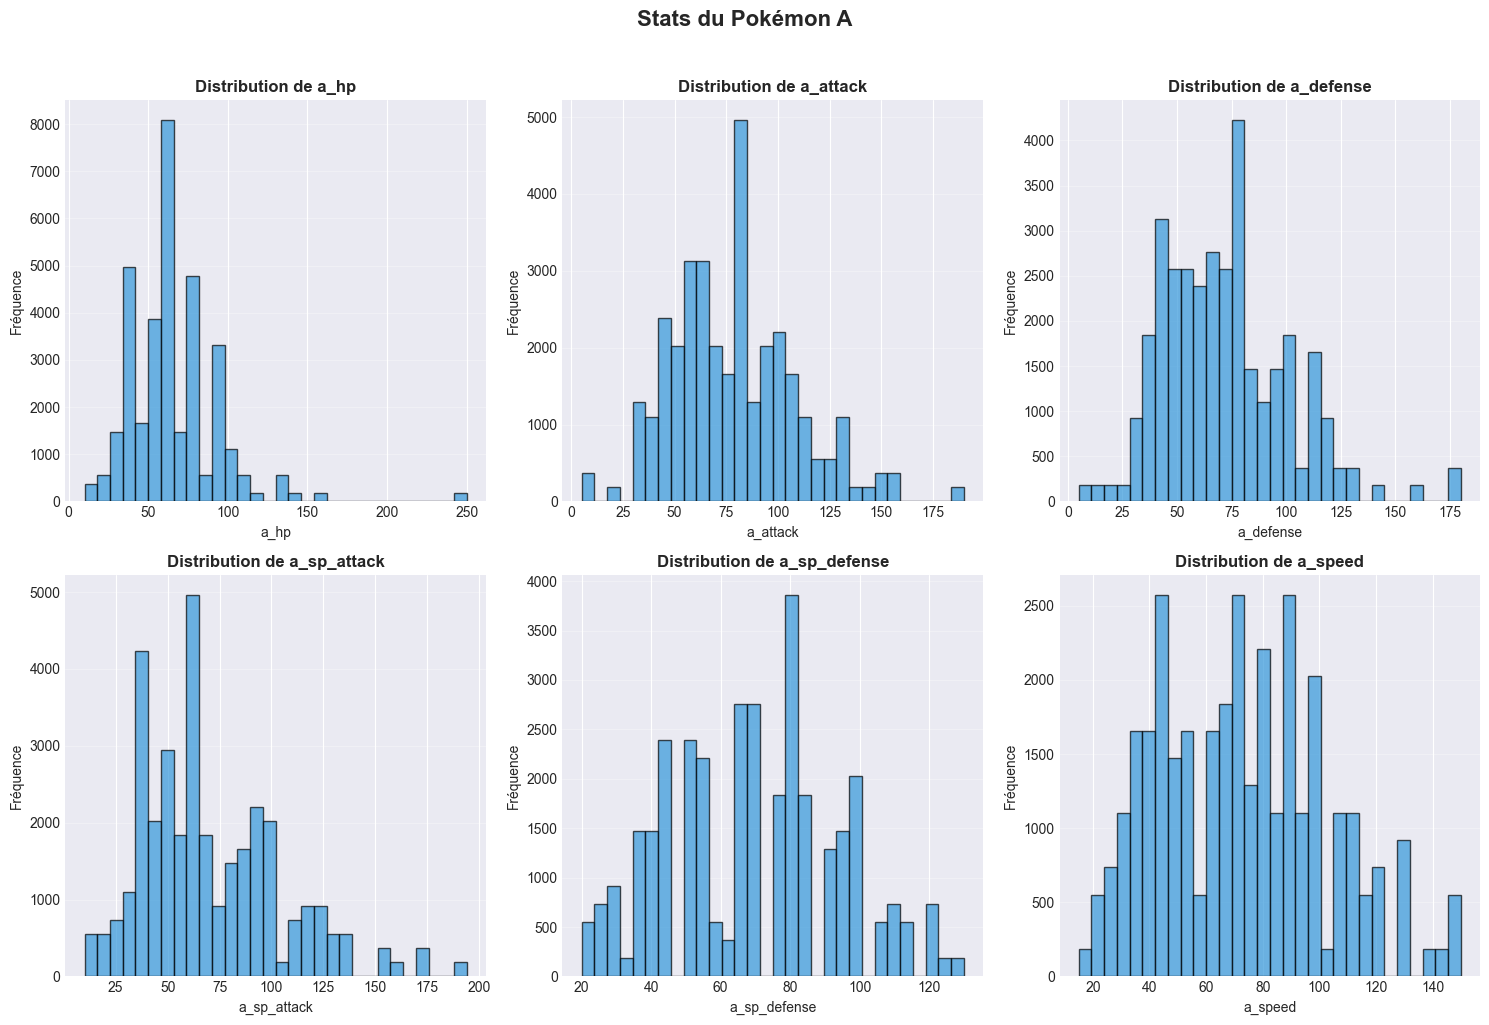

In [9]:
# Distribution des stats du Pokémon A
stat_cols_a = ['a_hp', 'a_attack', 'a_defense', 'a_sp_attack', 'a_sp_defense', 'a_speed']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(stat_cols_a):
    df_raw[col].plot(kind='hist', bins=30, ax=axes[i], color='#3498db', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution de {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Fréquence')
    axes[i].grid(axis='y', alpha=0.3)

plt.suptitle('Stats du Pokémon A', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

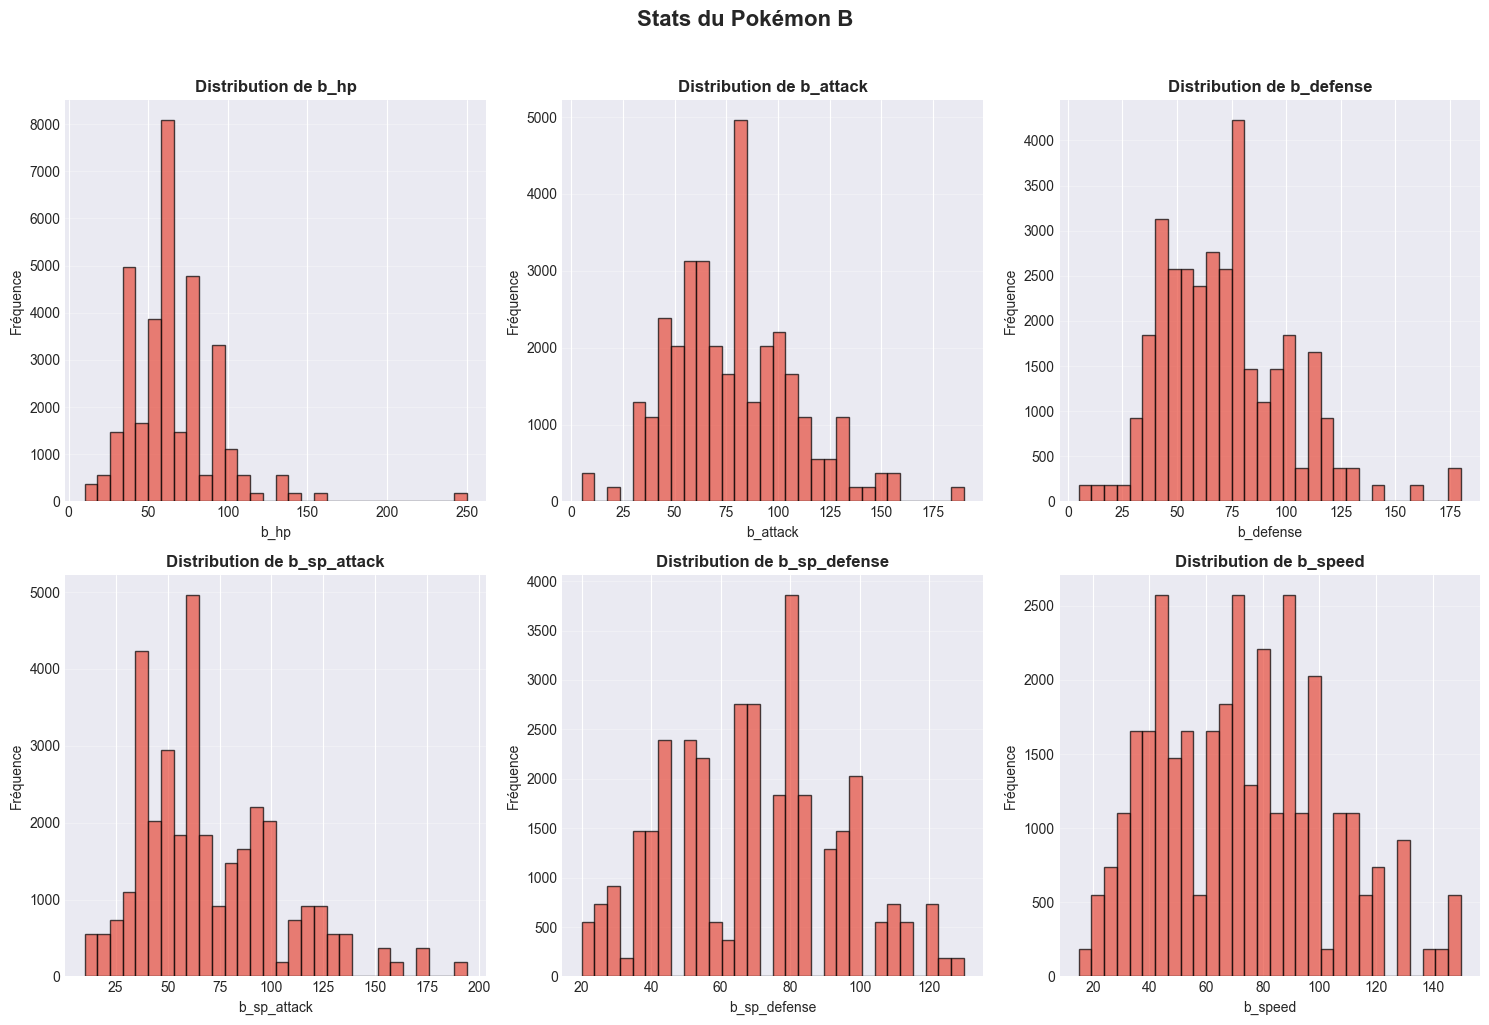

In [10]:
# Distribution des stats du Pokémon B
stat_cols_b = ['b_hp', 'b_attack', 'b_defense', 'b_sp_attack', 'b_sp_defense', 'b_speed']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(stat_cols_b):
    df_raw[col].plot(kind='hist', bins=30, ax=axes[i], color='#e74c3c', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution de {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Fréquence')
    axes[i].grid(axis='y', alpha=0.3)

plt.suptitle('Stats du Pokémon B', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

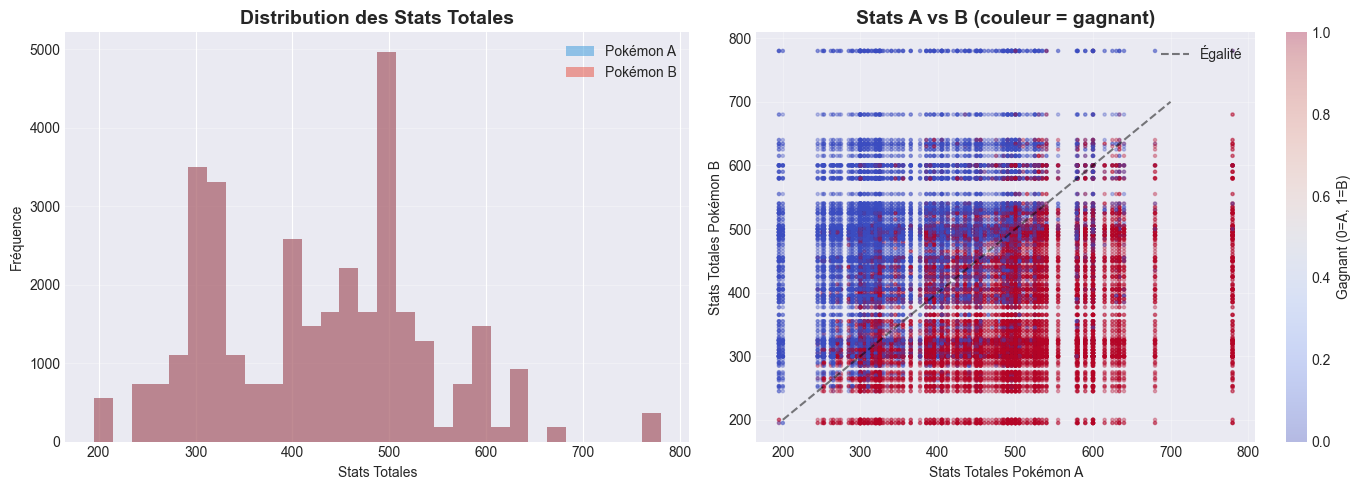

In [11]:
# Comparaison des stats totales
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution a_total_stats vs b_total_stats
axes[0].hist(df_raw['a_total_stats'], bins=30, alpha=0.5, label='Pokémon A', color='#3498db')
axes[0].hist(df_raw['b_total_stats'], bins=30, alpha=0.5, label='Pokémon B', color='#e74c3c')
axes[0].set_title('Distribution des Stats Totales', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Stats Totales')
axes[0].set_ylabel('Fréquence')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Scatter plot: stats totales A vs B, coloré par gagnant
scatter = axes[1].scatter(df_raw['a_total_stats'], df_raw['b_total_stats'], 
                          c=df_raw['winner'], cmap='coolwarm', alpha=0.3, s=5)
axes[1].set_xlabel('Stats Totales Pokémon A')
axes[1].set_ylabel('Stats Totales Pokémon B')
axes[1].set_title('Stats A vs B (couleur = gagnant)', fontsize=14, fontweight='bold')
axes[1].plot([200, 700], [200, 700], 'k--', alpha=0.5, label='Égalité')  # Ligne d'égalité
axes[1].legend()
axes[1].grid(alpha=0.3)
plt.colorbar(scatter, ax=axes[1], label='Gagnant (0=A, 1=B)')

plt.tight_layout()
plt.show()

## 5. Analyse des Types

🔥 DISTRIBUTION DES TYPES PRIMAIRES


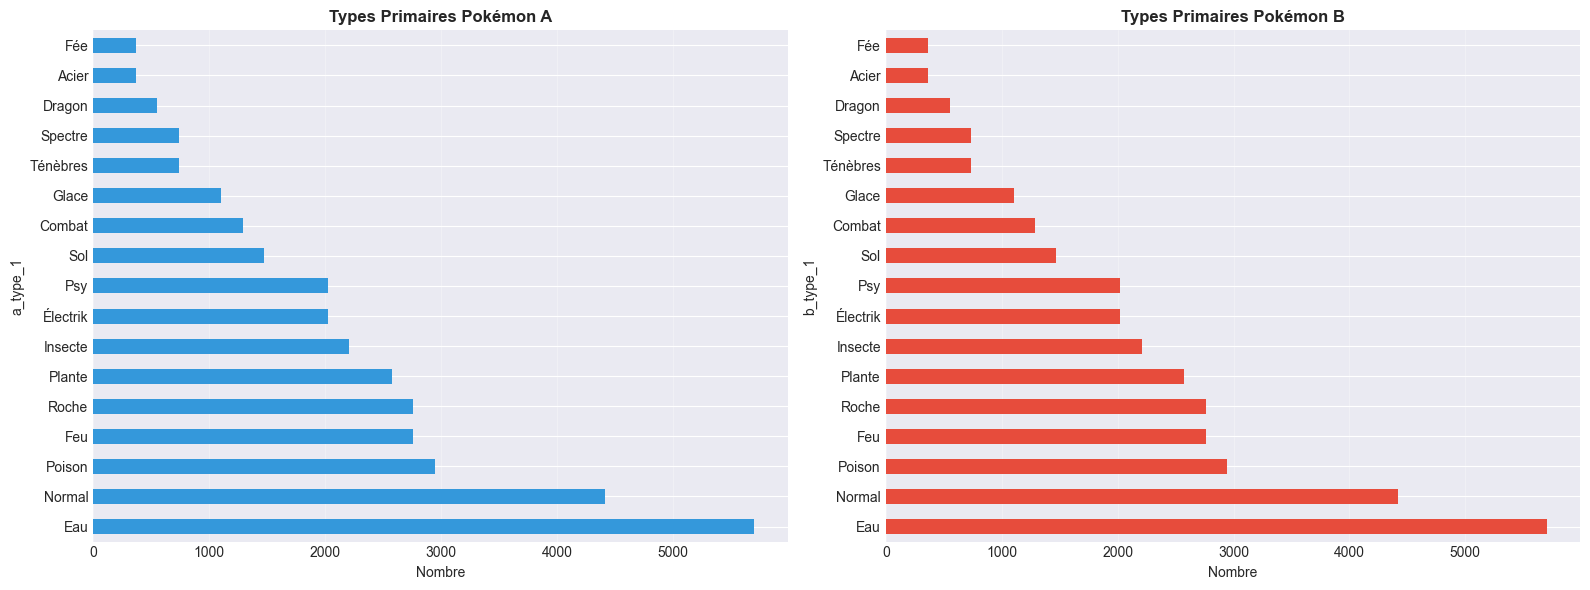

In [12]:
# Distribution des types primaires
print("=" * 80)
print("🔥 DISTRIBUTION DES TYPES PRIMAIRES")
print("=" * 80)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Type 1 Pokémon A
type_a_counts = df_raw['a_type_1'].value_counts()
type_a_counts.plot(kind='barh', ax=axes[0], color='#3498db')
axes[0].set_title('Types Primaires Pokémon A', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Nombre')
axes[0].grid(axis='x', alpha=0.3)

# Type 1 Pokémon B
type_b_counts = df_raw['b_type_1'].value_counts()
type_b_counts.plot(kind='barh', ax=axes[1], color='#e74c3c')
axes[1].set_title('Types Primaires Pokémon B', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Nombre')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


🏆 TAUX DE VICTOIRE PAR TYPE PRIMAIRE (Pokémon A)
          Total Matchups  Wins (A)  Win Rate
a_type_1                                    
Ténèbres             736       565     0.768
Sol                 1472       979     0.665
Spectre              736       477     0.648
Insecte             2208      1292     0.585
Électrik            2024      1143     0.565
Glace               1104       620     0.562
Normal              4416      2345     0.531
Poison              2944      1509     0.513
Roche               2760      1383     0.501
Eau                 5704      2829     0.496
Combat              1288       564     0.438
Dragon               552       236     0.428
Psy                 2024       848     0.419
Acier                368       147     0.399
Feu                 2760      1044     0.378
Plante              2576       911     0.354
Fée                  368       124     0.337


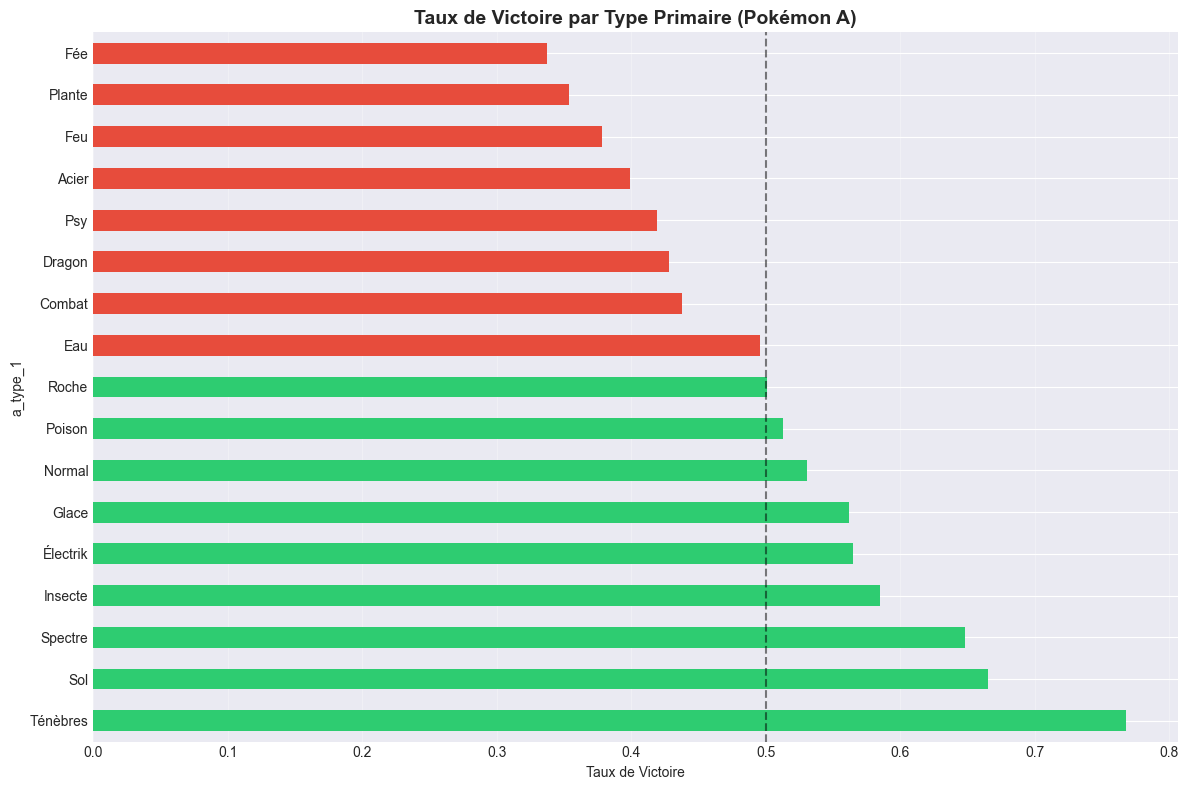

In [13]:
# Taux de victoire par type primaire du Pokémon A
print("\n" + "=" * 80)
print("🏆 TAUX DE VICTOIRE PAR TYPE PRIMAIRE (Pokémon A)")
print("=" * 80)

win_rate_by_type_a = df_raw.groupby('a_type_1').agg({
    'winner': ['count', lambda x: (x == 0).sum(), 'mean']
}).round(3)
win_rate_by_type_a.columns = ['Total Matchups', 'Wins (A)', 'Win Rate']
win_rate_by_type_a['Win Rate'] = 1 - win_rate_by_type_a['Win Rate']  # Inverser car winner=0 signifie A gagne
win_rate_by_type_a = win_rate_by_type_a.sort_values('Win Rate', ascending=False)
print(win_rate_by_type_a)

# Visualisation
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['#2ecc71' if wr > 0.5 else '#e74c3c' for wr in win_rate_by_type_a['Win Rate']]
win_rate_by_type_a['Win Rate'].plot(kind='barh', ax=ax, color=colors)
ax.axvline(x=0.5, color='black', linestyle='--', alpha=0.5)
ax.set_title('Taux de Victoire par Type Primaire (Pokémon A)', fontsize=14, fontweight='bold')
ax.set_xlabel('Taux de Victoire')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Analyse des Moves

⚔️ TOP 15 MOVES SÉLECTIONNÉS (Pokémon A)
a_move_name
Lance-Soleil    4815
Séisme          2910
Destruction     1865
Tonnerre        1849
Laser Glace     1846
Surf            1786
Psyko           1607
Tunnel          1398
Explosion       1186
Déflagration    1091
Bomb-Beurk      1050
Éboulement       956
Damoclès         936
Casse-Brique     898
Surpuissance     881
Name: count, dtype: int64


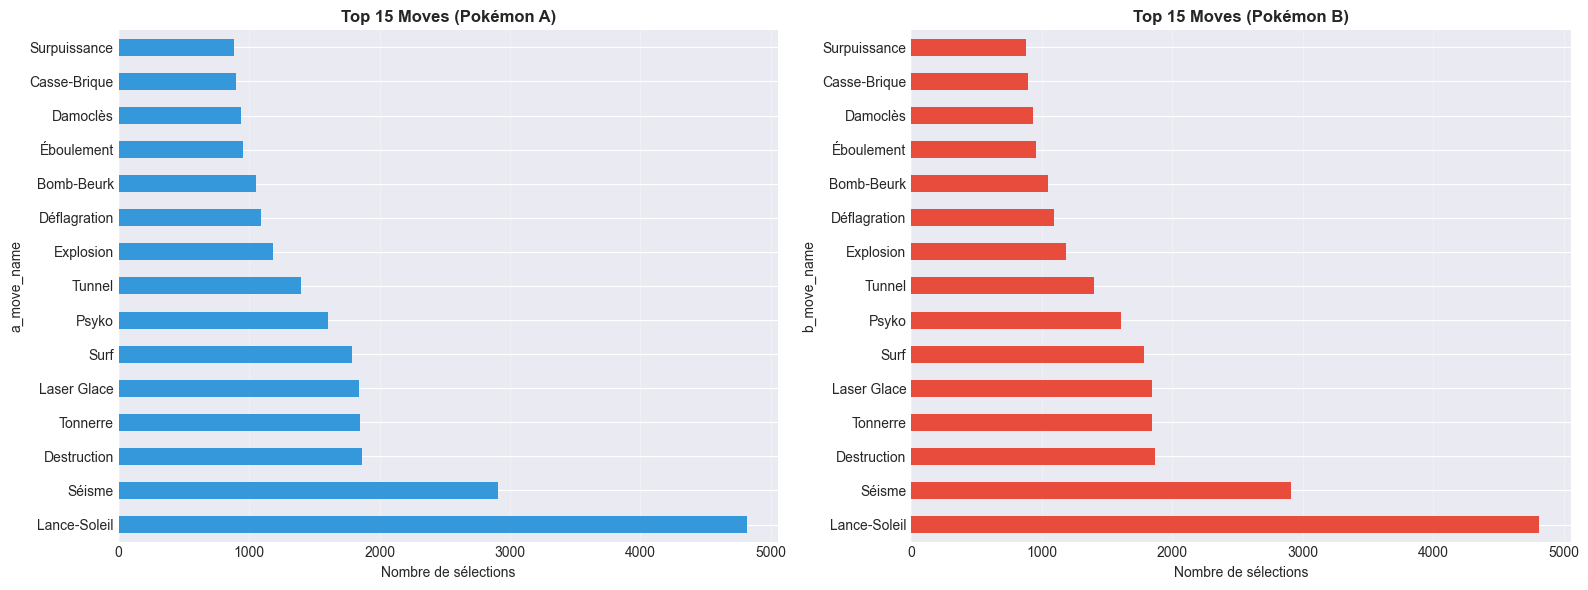

In [14]:
# Top moves utilisés par Pokémon A
print("=" * 80)
print("⚔️ TOP 15 MOVES SÉLECTIONNÉS (Pokémon A)")
print("=" * 80)
move_a_counts = df_raw['a_move_name'].value_counts().head(15)
print(move_a_counts)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

move_a_counts.plot(kind='barh', ax=axes[0], color='#3498db')
axes[0].set_title('Top 15 Moves (Pokémon A)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Nombre de sélections')
axes[0].grid(axis='x', alpha=0.3)

move_b_counts = df_raw['b_move_name'].value_counts().head(15)
move_b_counts.plot(kind='barh', ax=axes[1], color='#e74c3c')
axes[1].set_title('Top 15 Moves (Pokémon B)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Nombre de sélections')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


💥 DISTRIBUTION DES PUISSANCES DE MOVES


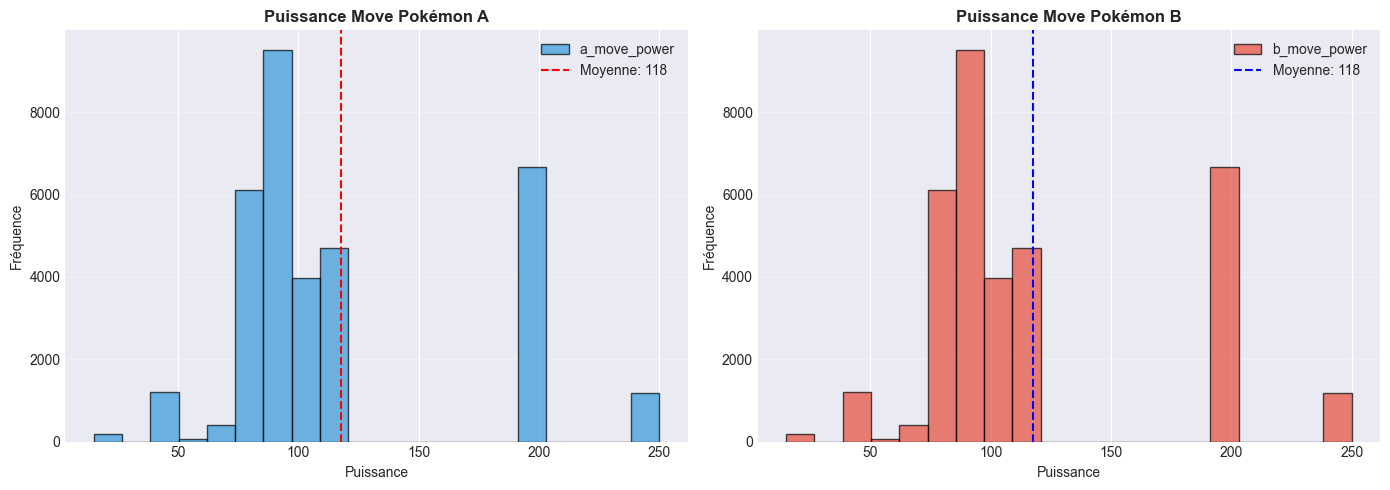

In [15]:
# Distribution des puissances de moves
print("\n" + "=" * 80)
print("💥 DISTRIBUTION DES PUISSANCES DE MOVES")
print("=" * 80)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Move power A
df_raw['a_move_power'].plot(kind='hist', bins=20, ax=axes[0], color='#3498db', 
                             edgecolor='black', alpha=0.7)
axes[0].set_title('Puissance Move Pokémon A', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Puissance')
axes[0].set_ylabel('Fréquence')
axes[0].axvline(df_raw['a_move_power'].mean(), color='red', linestyle='--', label=f"Moyenne: {df_raw['a_move_power'].mean():.0f}")
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Move power B
df_raw['b_move_power'].plot(kind='hist', bins=20, ax=axes[1], color='#e74c3c', 
                             edgecolor='black', alpha=0.7)
axes[1].set_title('Puissance Move Pokémon B', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Puissance')
axes[1].set_ylabel('Fréquence')
axes[1].axvline(df_raw['b_move_power'].mean(), color='blue', linestyle='--', label=f"Moyenne: {df_raw['b_move_power'].mean():.0f}")
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


⚡ DISTRIBUTION DES PRIORITÉS DE MOVES

Priorités Pokémon A:
a_move_priority
0    33040
1      382
2      618
Name: count, dtype: int64

Priorités Pokémon B:
b_move_priority
0    33040
1      382
2      618
Name: count, dtype: int64


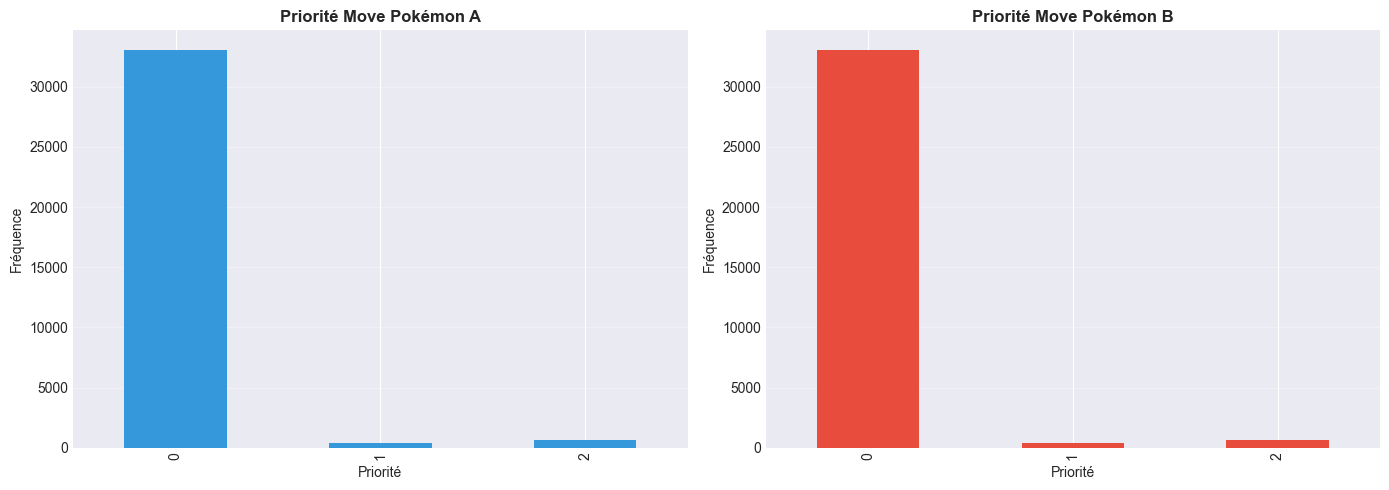

In [16]:
# Analyse des priorités
print("\n" + "=" * 80)
print("⚡ DISTRIBUTION DES PRIORITÉS DE MOVES")
print("=" * 80)

print("\nPriorités Pokémon A:")
print(df_raw['a_move_priority'].value_counts().sort_index())

print("\nPriorités Pokémon B:")
print(df_raw['b_move_priority'].value_counts().sort_index())

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df_raw['a_move_priority'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='#3498db')
axes[0].set_title('Priorité Move Pokémon A', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Priorité')
axes[0].set_ylabel('Fréquence')
axes[0].grid(axis='y', alpha=0.3)

df_raw['b_move_priority'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='#e74c3c')
axes[1].set_title('Priorité Move Pokémon B', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Priorité')
axes[1].set_ylabel('Fréquence')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Corrélations

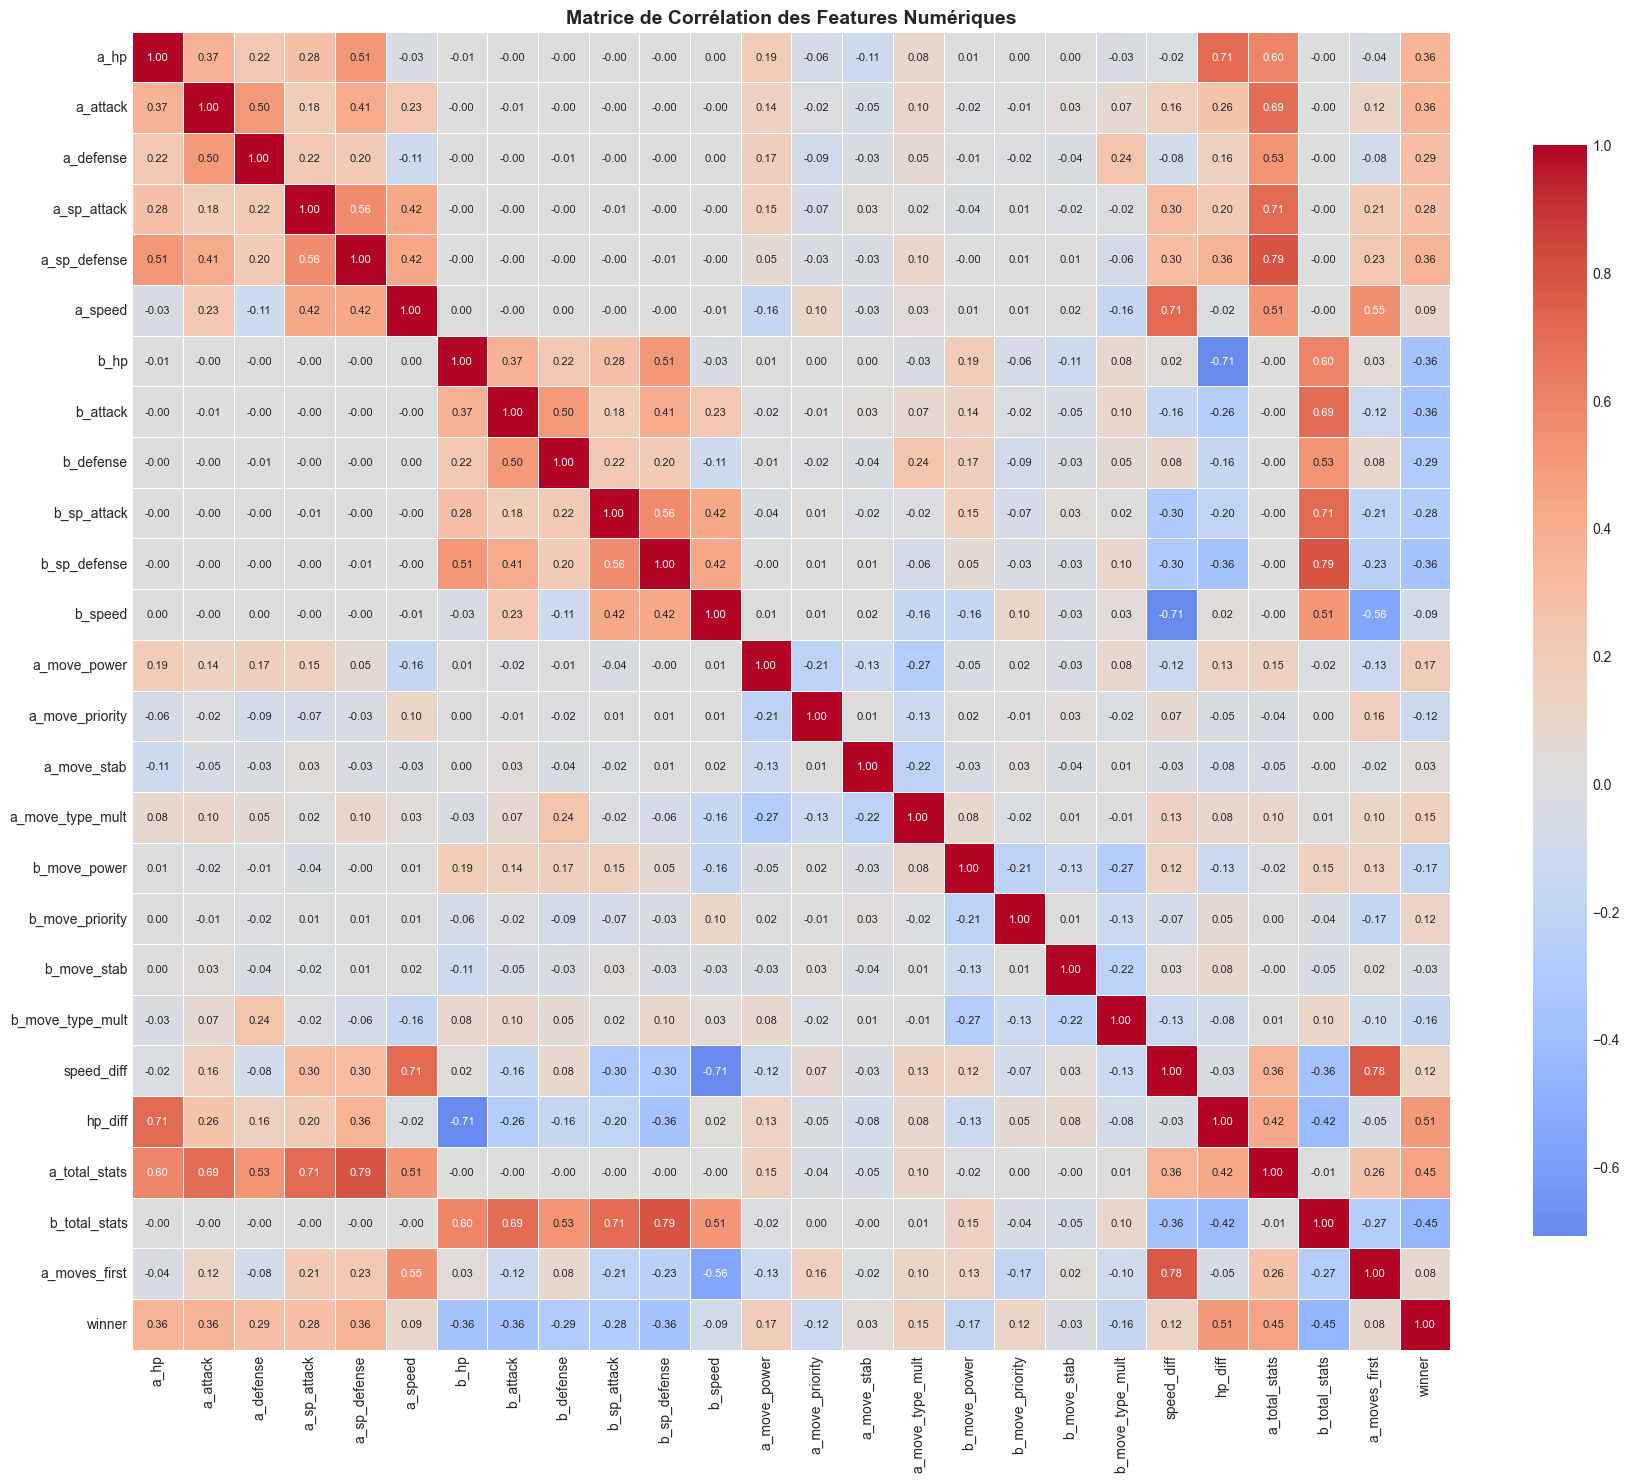

In [17]:
# Matrice de corrélation pour les features numériques
numeric_cols = [
    'a_hp', 'a_attack', 'a_defense', 'a_sp_attack', 'a_sp_defense', 'a_speed',
    'b_hp', 'b_attack', 'b_defense', 'b_sp_attack', 'b_sp_defense', 'b_speed',
    'a_move_power', 'a_move_priority', 'a_move_stab', 'a_move_type_mult',
    'b_move_power', 'b_move_priority', 'b_move_stab', 'b_move_type_mult',
    'speed_diff', 'hp_diff', 'a_total_stats', 'b_total_stats', 'a_moves_first',
    'winner'
]

# Sélectionner uniquement les colonnes existantes
numeric_cols = [col for col in numeric_cols if col in df_raw.columns]

corr_matrix = df_raw[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax,
            annot_kws={"size": 8})
ax.set_title('Matrice de Corrélation des Features Numériques', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

🎯 CORRÉLATION AVEC winner
winner              1.000000
hp_diff             0.505611
a_total_stats       0.448914
a_sp_defense        0.359862
a_hp                0.358517
a_attack            0.355656
a_defense           0.288760
a_sp_attack         0.284118
a_move_power        0.174264
a_move_type_mult    0.154920
speed_diff          0.124249
b_move_priority     0.115977
a_speed             0.087903
a_moves_first       0.075528
a_move_stab         0.032171
b_move_stab        -0.032364
b_speed            -0.088289
a_move_priority    -0.116055
b_move_type_mult   -0.155195
b_move_power       -0.173807
b_sp_attack        -0.284491
b_defense          -0.288949
b_attack           -0.355672
b_hp               -0.358465
b_sp_defense       -0.359973
b_total_stats      -0.449195
Name: winner, dtype: float64


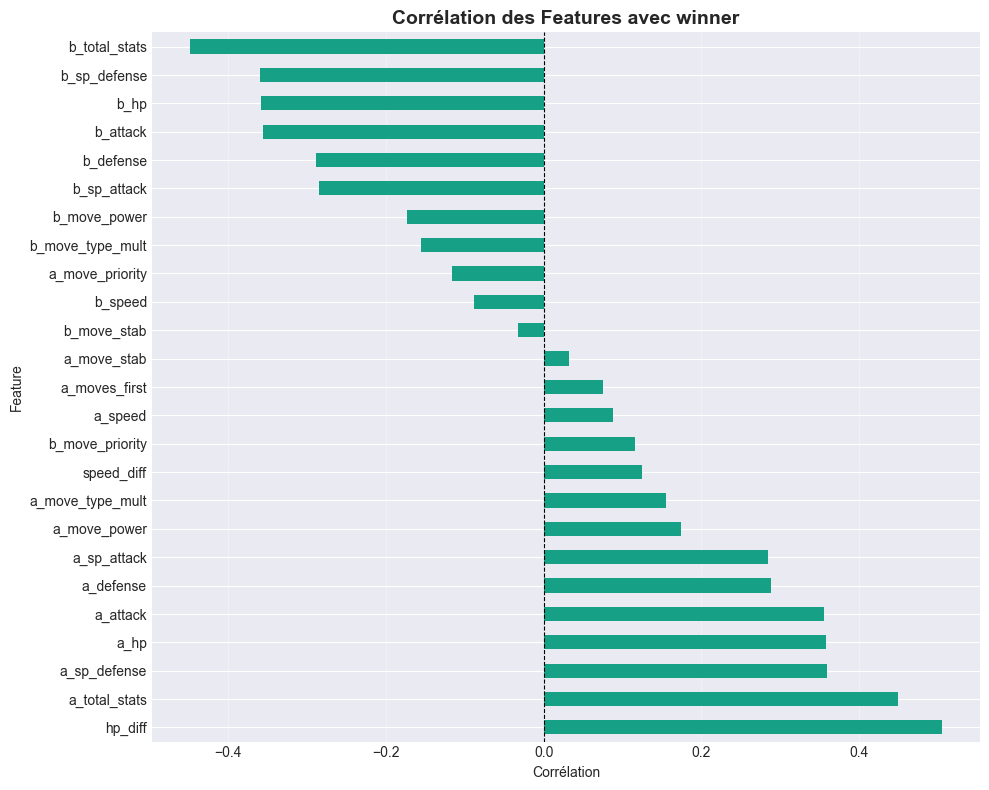

In [18]:
# Corrélation avec la variable cible
print("=" * 80)
print("🎯 CORRÉLATION AVEC winner")
print("=" * 80)
target_corr = corr_matrix['winner'].sort_values(ascending=False)
print(target_corr)

fig, ax = plt.subplots(figsize=(10, 8))
target_corr.drop('winner').plot(kind='barh', ax=ax, color='#16a085')
ax.set_title('Corrélation des Features avec winner', fontsize=14, fontweight='bold')
ax.set_xlabel('Corrélation')
ax.set_ylabel('Feature')
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Analyse des Features Dérivées

⚡ IMPACT DE speed_diff SUR LE GAGNANT


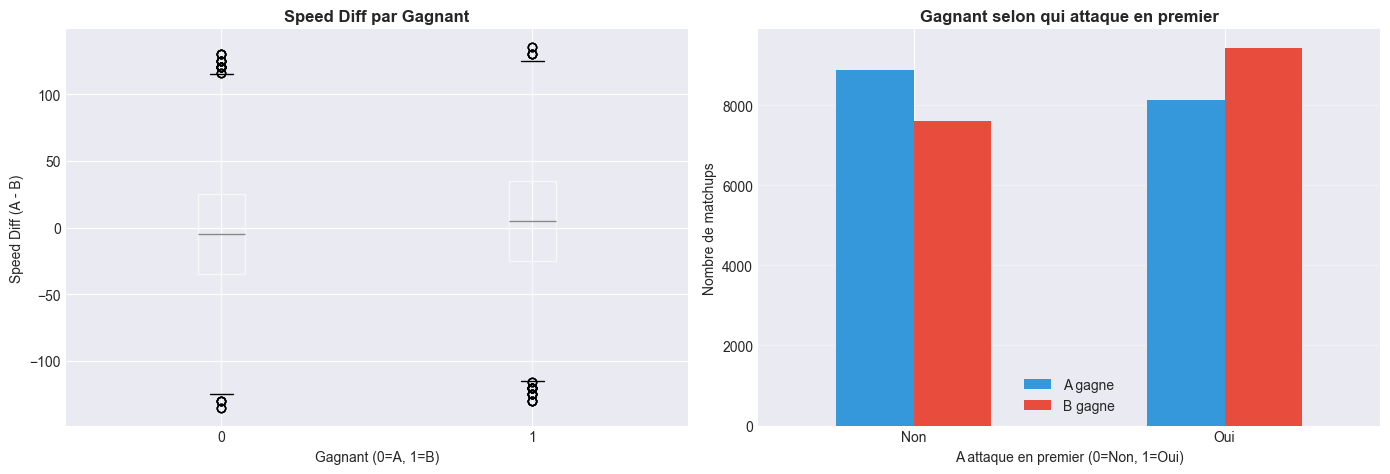

In [19]:
# Analyse de speed_diff et son impact sur le gagnant
print("=" * 80)
print("⚡ IMPACT DE speed_diff SUR LE GAGNANT")
print("=" * 80)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot speed_diff par gagnant
df_raw.boxplot(column='speed_diff', by='winner', ax=axes[0])
axes[0].set_title('Speed Diff par Gagnant', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Gagnant (0=A, 1=B)')
axes[0].set_ylabel('Speed Diff (A - B)')
plt.suptitle('')  # Supprimer le titre auto

# Distribution de a_moves_first par gagnant
moves_first_win = df_raw.groupby(['a_moves_first', 'winner']).size().unstack(fill_value=0)
moves_first_win.plot(kind='bar', ax=axes[1], color=['#3498db', '#e74c3c'])
axes[1].set_title('Gagnant selon qui attaque en premier', fontsize=12, fontweight='bold')
axes[1].set_xlabel('A attaque en premier (0=Non, 1=Oui)')
axes[1].set_ylabel('Nombre de matchups')
axes[1].legend(['A gagne', 'B gagne'])
axes[1].set_xticklabels(['Non', 'Oui'], rotation=0)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


🔥 IMPACT DU STAB ET TYPE MULTIPLIER


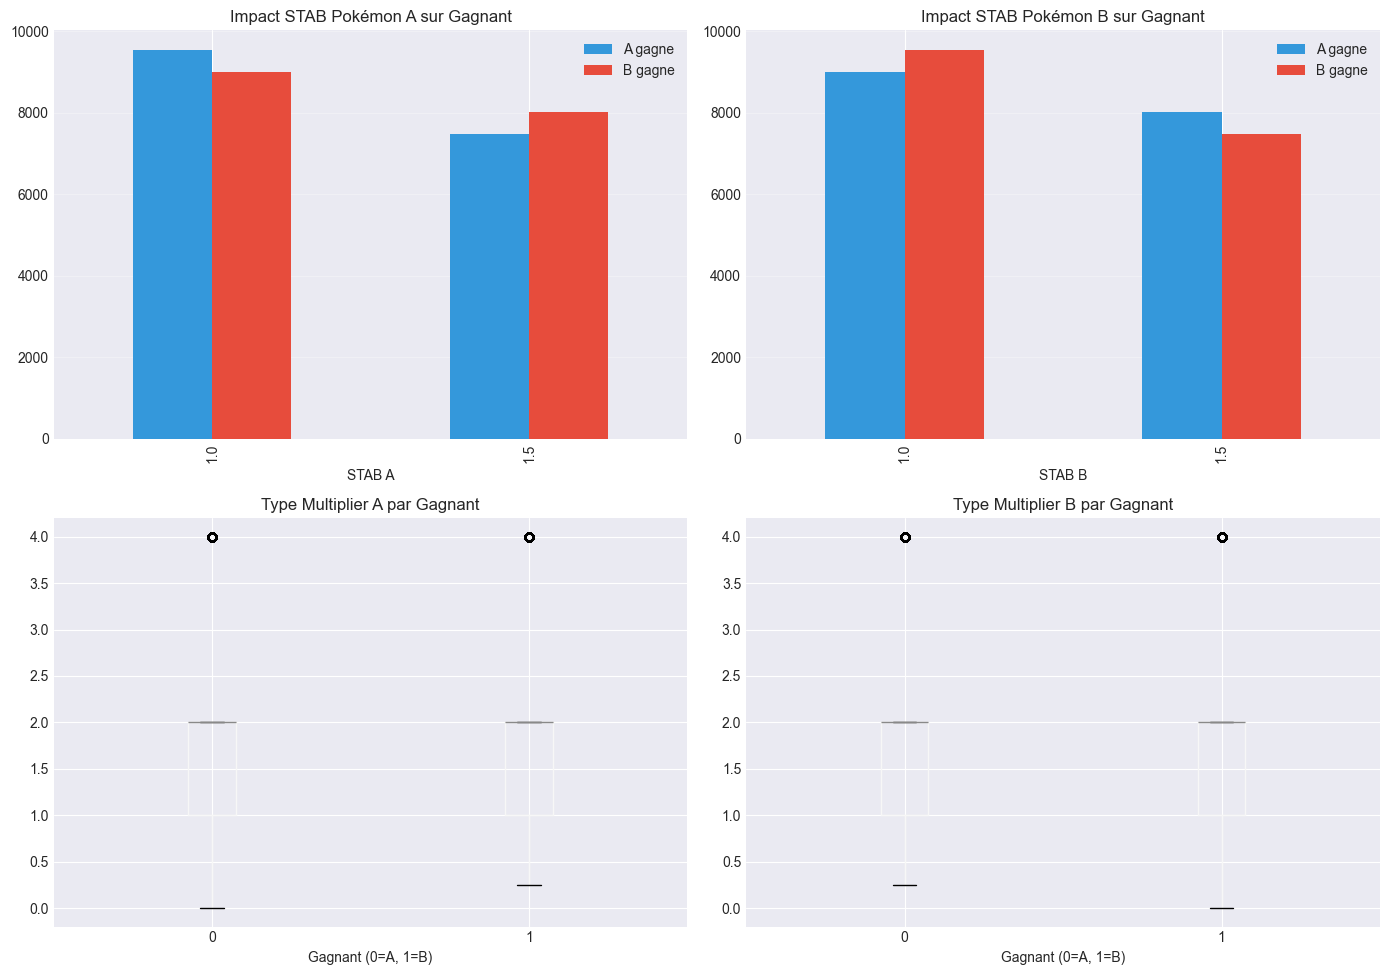

In [20]:
# Impact du STAB et type_multiplier
print("\n" + "=" * 80)
print("🔥 IMPACT DU STAB ET TYPE MULTIPLIER")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# STAB A par gagnant
stab_a_win = df_raw.groupby(['a_move_stab', 'winner']).size().unstack(fill_value=0)
stab_a_win.plot(kind='bar', ax=axes[0, 0], color=['#3498db', '#e74c3c'])
axes[0, 0].set_title('Impact STAB Pokémon A sur Gagnant', fontsize=12)
axes[0, 0].set_xlabel('STAB A')
axes[0, 0].legend(['A gagne', 'B gagne'])
axes[0, 0].grid(axis='y', alpha=0.3)

# STAB B par gagnant
stab_b_win = df_raw.groupby(['b_move_stab', 'winner']).size().unstack(fill_value=0)
stab_b_win.plot(kind='bar', ax=axes[0, 1], color=['#3498db', '#e74c3c'])
axes[0, 1].set_title('Impact STAB Pokémon B sur Gagnant', fontsize=12)
axes[0, 1].set_xlabel('STAB B')
axes[0, 1].legend(['A gagne', 'B gagne'])
axes[0, 1].grid(axis='y', alpha=0.3)

# Type mult A distribution par gagnant
df_raw.boxplot(column='a_move_type_mult', by='winner', ax=axes[1, 0])
axes[1, 0].set_title('Type Multiplier A par Gagnant', fontsize=12)
axes[1, 0].set_xlabel('Gagnant (0=A, 1=B)')
plt.suptitle('')

# Type mult B distribution par gagnant
df_raw.boxplot(column='b_move_type_mult', by='winner', ax=axes[1, 1])
axes[1, 1].set_title('Type Multiplier B par Gagnant', fontsize=12)
axes[1, 1].set_xlabel('Gagnant (0=A, 1=B)')
plt.suptitle('')

plt.tight_layout()
plt.show()

In [21]:
# Valeurs manquantes
print("=" * 80)
print("❓ ANALYSE DES VALEURS MANQUANTES")
print("=" * 80)

missing = df_raw.isnull().sum()
missing_pct = (missing / len(df_raw)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
}).sort_values('Missing Count', ascending=False)

if missing_df['Missing Count'].sum() == 0:
    print("\n✅ Aucune valeur manquante détectée!")
else:
    print(missing_df[missing_df['Missing Count'] > 0])
    print(f"\n⚠️ Total valeurs manquantes: {missing_df['Missing Count'].sum()}")

❓ ANALYSE DES VALEURS MANQUANTES

✅ Aucune valeur manquante détectée!


## 9. Conclusions

### Observations Principales

#### 1. **Équilibre des Classes**
- Le dataset présente un excellent équilibre (~50/50) entre Pokémon A gagnant et Pokémon B gagnant
- Cet équilibre est naturel car tous les matchups sont symétriques (A vs B = B vs A inversé)

#### 2. **Features les Plus Corrélées au Gagnant**
- `a_moves_first`: Si A attaque en premier (vitesse ou priorité), il a plus de chances de gagner
- `speed_diff`: La différence de vitesse impacte directement qui attaque en premier
- `a_move_type_mult` / `b_move_type_mult`: L'avantage de type est crucial
- `a_total_stats` / `b_total_stats`: Les stats totales reflètent la puissance générale

#### 3. **Impact de la Priorité**
- La plupart des moves ont priorité 0 (normal)
- Les moves prioritaires (+1, +2) sont rares mais peuvent renverser le combat

#### 4. **STAB et Type Effectiveness**
- Le STAB (Same Type Attack Bonus) donne un boost de x1.5
- Le multiplicateur de type (0.25x à 4x) peut complètement changer l'issue

#### 5. **Qualité des Données**
- ✅ Aucune valeur manquante
- ✅ Types cohérents
- ✅ Distribution équilibrée

---

### Recommandations pour la Suite

1. **Feature Engineering** (notebook 02):
   - Encoder les types (one-hot ou embeddings)
   - Créer des ratios (stats A / stats B)
   - Features d'interaction (STAB × type_mult)

2. **Modélisation** (notebook 03):
   - Commencer par Random Forest (robuste, interprétable)
   - Tester XGBoost/LightGBM pour performances
   - Cross-validation stratifiée

---

**✅ Dataset validé et prêt pour le feature engineering!**